#### Genetic Variation Analysis through PCA

This notebook demonstrates how to analyze genetic variation within and across populations and superpopulations using Principal Component Analysis (PCA). The aim is to visualise genetic diversity and calculate genetic distances to understand the relationships between different genetic groups.

In [2]:
import pandas as pd
import allel
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Data Preparation

The metadata is loaded for populations and superpopulations. These metadata are essential for mapping saples IDs to their respective genetic groups, facilitating a detailed analysis.

In [8]:
# Load population metadata
metadata_df = pd.read_csv('sample_pop.tsv', sep='\t')

In [9]:
# # Load superpopulation metadata
superpop_df = pd.read_csv('sample_superpop.csv')

In [10]:
# Merge metadata on the 'id' column
metadata_df = metadata_df.merge(superpop_df, on='id', how='left')

In [11]:
print(metadata_df.columns)

Index(['id', 'population_x', 'population_y', 'population_name',
       'superpopulation'],
      dtype='object')


#### Sample Selection and Mapping

To ensure a balanced analysis, I selected a subset of individuals from each population. And then mappings from sample IDs were created to their respective population and superpopulation labels.

In [12]:
# Create mappings for population and superpopulation labels
population_mapping = pd.Series(metadata_df['population_x'].values, index=metadata_df['id']).to_dict()
superpopulation_mapping = pd.Series(metadata_df['superpopulation'].values, index=metadata_df['id']).to_dict()

In [13]:
# Select 10 individuals from each population
individuals_per_population = {pop: [] for pop in set(population_mapping.values())}
for sample_id, pop in population_mapping.items():
    if len(individuals_per_population[pop]) < 10:
        individuals_per_population[pop].append(sample_id)
selected_samples = [ind for inds in individuals_per_population.values() for ind in inds]

#### PCA Analysis

PCA is performed on the selected samples to explore the genetic variation. The PCA results will help  visualize the genetic structure across populations and superpopulations.

In [14]:
# Load VCF data
vcf_path = 'chr1.vcf.gz'
callset = allel.read_vcf(vcf_path, samples=selected_samples)

In [15]:
# Convert to a dosage matrix
genotypes = allel.GenotypeArray(callset['calldata/GT'])
genotype_dosage = genotypes.to_n_alt()

In [16]:
# Transpose the dosage matrix for PCA
genotype_dosage_transposed = genotype_dosage.T

In [17]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(genotype_dosage_transposed)

In [18]:
# Create a DataFrame to store PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [19]:
# Annotate PCA results with population and superpopulation labels
pca_df['Population'] = [population_mapping[sample_id] for sample_id in selected_samples]
pca_df['Superpopulation'] = [superpopulation_mapping[sample_id] for sample_id in selected_samples]

In [20]:
# Define list of superpopulations
superpopulations = ['AMR', 'EUR', 'AFR', 'EAS', 'SAS'] 

In [26]:
# Loop through each superpopulation and create a scatter plot
for superpop in superpopulations:
    # Filter the DataFrame for the current superpopulation
    superpop_df = pca_df[pca_df['Superpopulation'] == superpop]

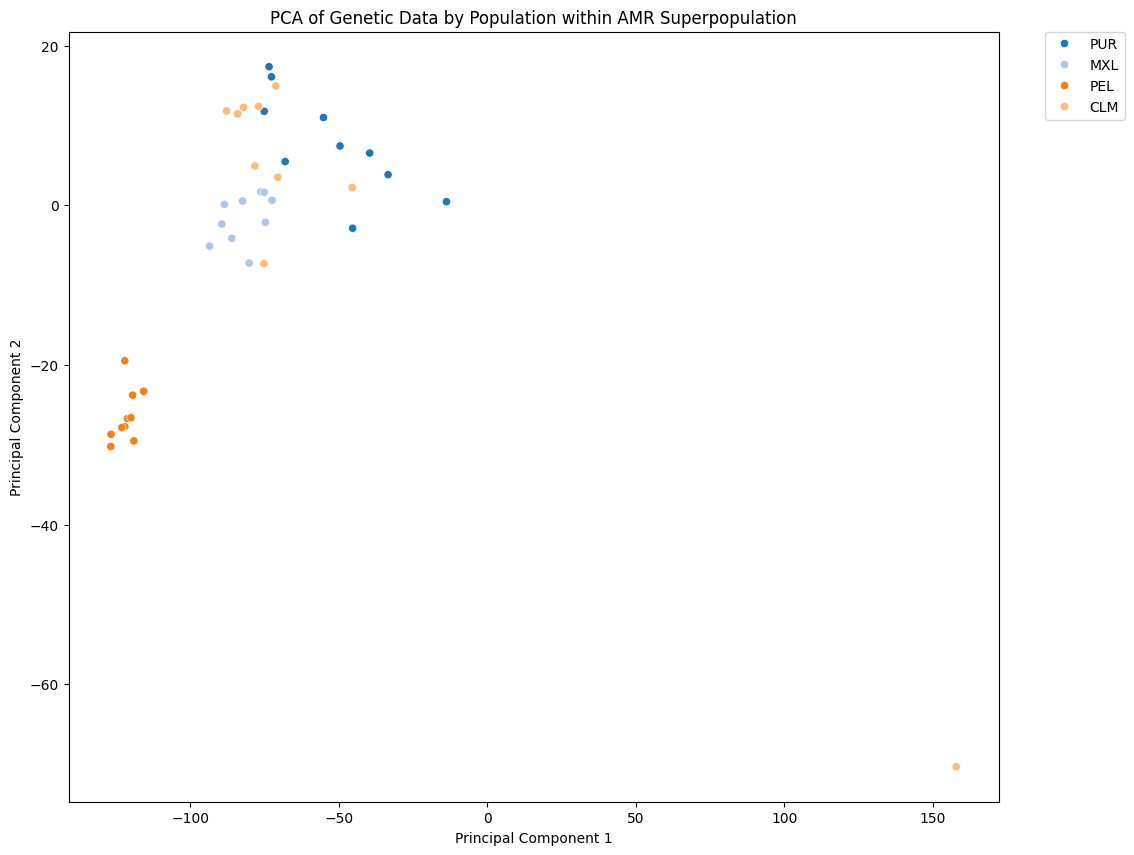

In [28]:
# AMR plot
superpop_df = pca_df[pca_df['Superpopulation'] == 'AMR']
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=superpop_df, hue='Population', palette='tab20', legend='full')
plt.title('PCA of Genetic Data by Population within AMR Superpopulation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

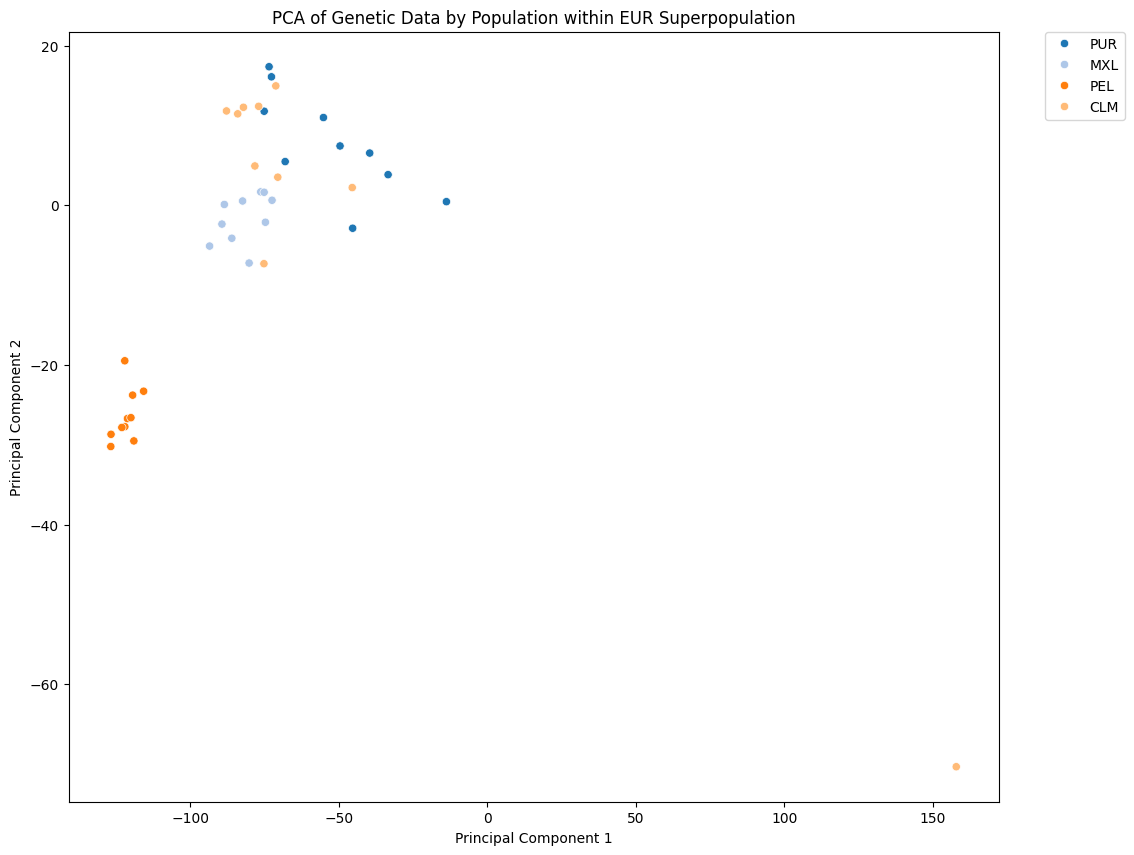

In [33]:
# EUR plot
superpop_df = pca_df[pca_df['Superpopulation'] == 'AMR']
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=superpop_df, hue='Population', palette='tab20', legend='full')
plt.title('PCA of Genetic Data by Population within EUR Superpopulation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

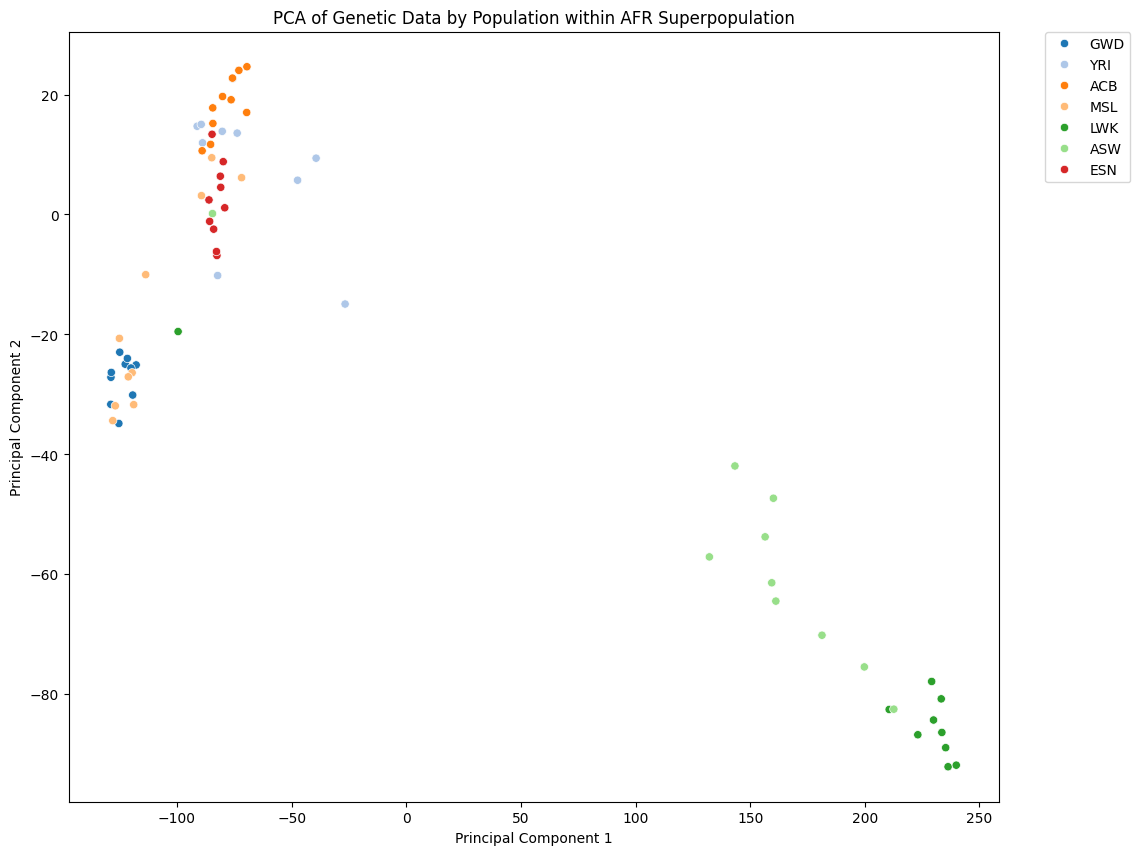

In [34]:
# AFR plot
superpop_df = pca_df[pca_df['Superpopulation'] == 'AFR']
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=superpop_df, hue='Population', palette='tab20', legend='full')
plt.title('PCA of Genetic Data by Population within AFR Superpopulation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

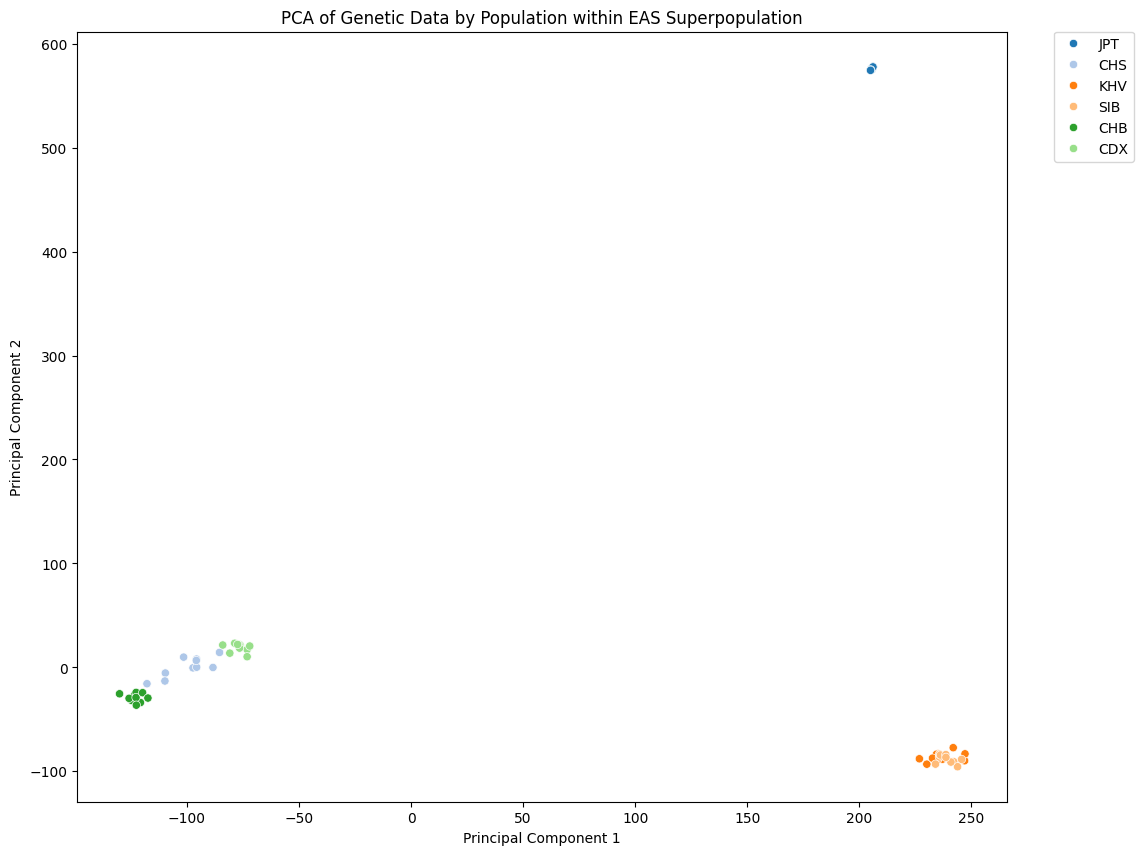

In [35]:
# EAS plot
superpop_df = pca_df[pca_df['Superpopulation'] == 'EAS']
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=superpop_df, hue='Population', palette='tab20', legend='full')
plt.title('PCA of Genetic Data by Population within EAS Superpopulation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

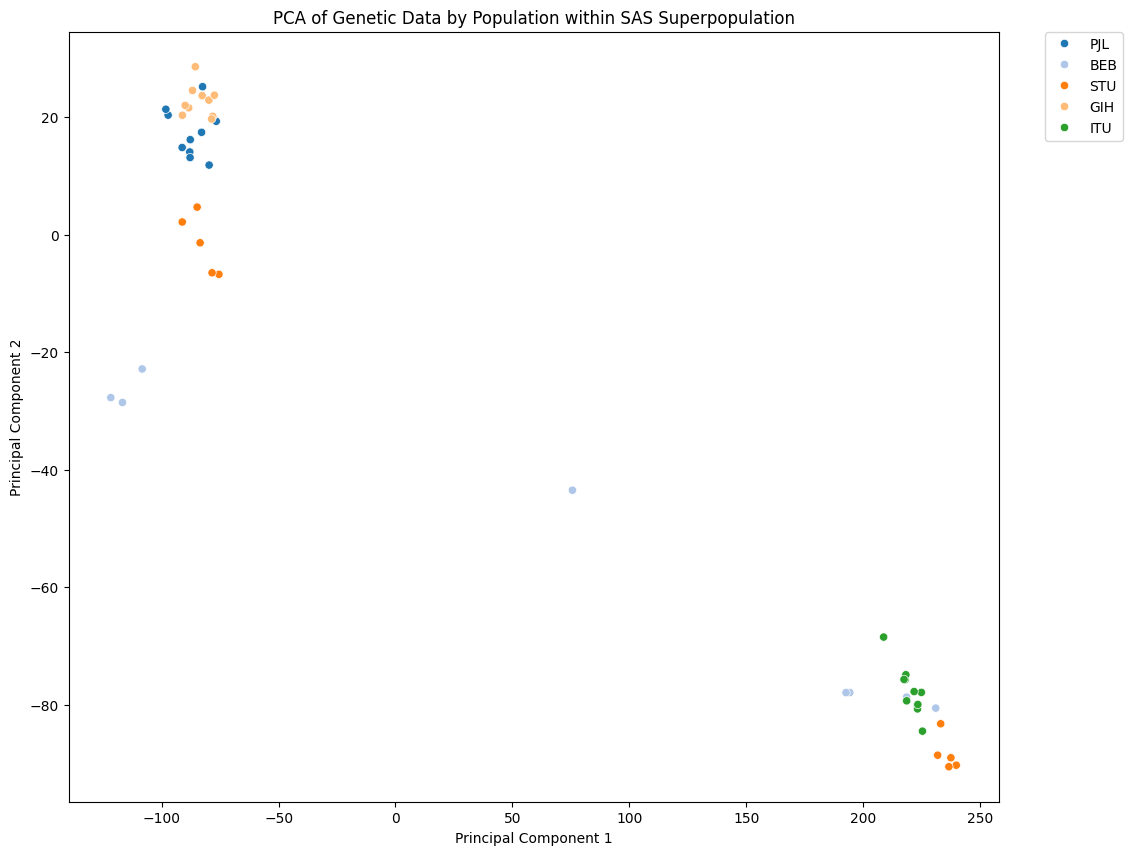

In [36]:
# SAS plot
superpop_df = pca_df[pca_df['Superpopulation'] == 'SAS']
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=superpop_df, hue='Population', palette='tab20', legend='full')
plt.title('PCA of Genetic Data by Population within SAS Superpopulation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [39]:
pca_df.reset_index(inplace=True)
pca_df.rename(columns={'index': 'IndividualID'}, inplace=True)

In [40]:
# Save the DataFrame to a TSV file
pca_df.to_csv('pca_scores.tsv', sep='\t', index=False)

#### Visualization of PCA Results

Visualizing PCA results enables the observation for the genetic diversity and structure visually, offering intuitive insights into the genetic relationships between and within groups.

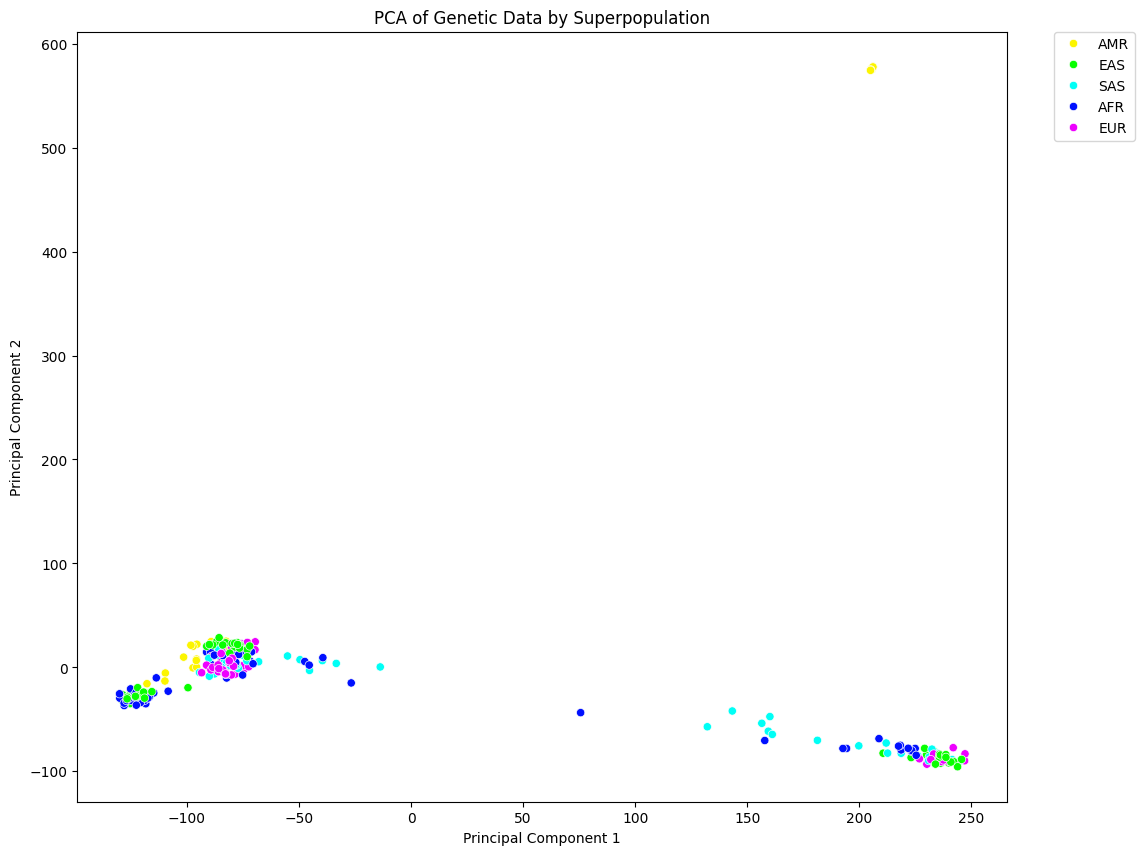

In [26]:
# Visualize PCA results, colored by Superpopulation
palette_superpop = sns.color_palette("hsv", len(set(pca_df['Superpopulation'].unique())))
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Superpopulation', palette=palette_superpop, legend='full')
plt.title('PCA of Genetic Data by Superpopulation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

**Principal Components**: PC1 and PC2 are the axes, which are the first two principal components derived from the PCA. They represent the directions of maximum variance in the genetic data. Essentially, they are new coordinates that best summarize the differences among the individuals.

**Superpopulation Clusters**: The different colors represent different superpopulations (like AMR for Americas, EAS for East Asian, SAS for South Asian, AFR for African, EUR for European). The clustering of points of the same color suggests that individuals within the same superpopulation are genetically more similar to each other than to individuals from other superpopulations.

#### Dispersion Along Axes

* The dispersion along PC1 (horizontal spread) likely represents the largest source of genetic variation within the dataset. This could be due to major genetic differences between the superpopulations.
* The dispersion along PC2 (vertical spread) represents the second largest source of variation. This axis often captures genetic variation that is orthogonal (independent) to the variation captured by PC1.

**Outliers**: Any points that are far away from others, such as those near the top of the plot, might be outliers. These could represent individuals with a unique genetic makeup or potential errors in the data. They could also represent admixed individuals or those with ancestry from multiple superpopulations.

**Genetic Distance**: The distance between clusters can be roughly interpreted as the genetic distance between superpopulations. For instance, if two superpopulation clusters are far apart on the plot, it suggests that they are genetically quite distinct.

**Scale of Axes**: The numbers on PC1 and PC2 represent the scores of individuals on those components. They don't have a unit but are scaled such that the dataset variance along PC1 is maximized. A larger absolute value on PC1 or PC2 indicates a greater deviation from the mean in the direction of that principal component.

**Biological Significance**: The PCA plot can reveal historical patterns of migration, admixture, and population structure. For example, if populations that are geographically or historically related cluster together, this is reflected in their genetic similarity.

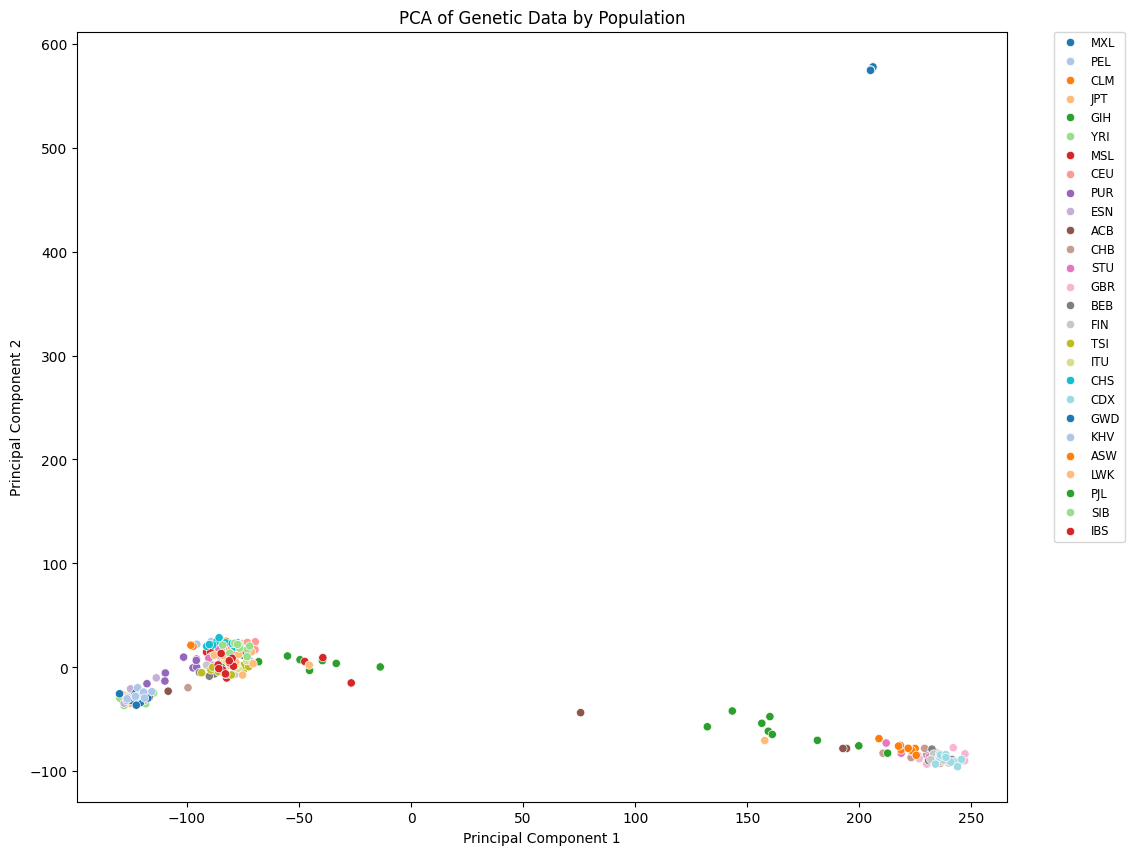

In [31]:
# Visualize PCA results, coloring by Population
palette_pop = sns.color_palette("tab20", len(set(pca_df['Population'].unique())))
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Population', palette=palette_pop, legend='full')
plt.title('PCA of Genetic Data by Population')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()

#### Interpretation of the PCA scatter plot

The scatter plot generated from the PCA represents a two-dimensional view of the genetic variability within and between the different populations included in the data.

#### Principal Component Axes and their Scale

* Principal component 1(PC1), shown on the x-axis, typically captures the largest amount of variance in the dataset. The scale from -100 to 250 along PC1 indicates the range of the scores for the first principal component across all individuals in the dataset. Points that are far apart along this axis have more genetic variation relative to the variance captured by PC1. This spread is common along this axis if PC1 captures a significant aspect of genetic diversity, such as gradient of geogrpahic or genetic variation.
* Principal Component 2(PC2), shown on the y-axis, captures the second-largest amount of variance and is orthogonal to PC1. The scale here, which appears to range from the bottom of the plot up to near 600, indicates the range of scores for the second principal component. The vertical position of the points reflects genetic variation thast is independent of PC1.

#### Interpretation of the Data Points
* The individual points (dots) on the plot represent genetic samples, and their positions are determined by their scores on PC1 and PC2. The proximity of these points to each other reflects genetic similarities and differences as captured by these two principal components.
* Congestion: The clustering or "congestion" of points around certain areas, suggests that there are groups of populations with less genetic differentation on these two principal components. This might indicate a shared genetic background or recent common ancestry among these populations.

#### The Spread along PC1 and PC2
* The spread along the axes, especially if certain populations are more widely distributed, may indicate a higher level of genetic diversity within those populations. It might also reflect a strong influence of specific genetic variants that are well captured by the PCA.

#### Dots at the Extremes
* PC1 Extremes: Points on the far left or right along PC1 suggest populations with unique genetic variations that are significantly different when considering the variation that PC1 represents.
* PC2 Extremes: Similarly, the two dots close to 600 on PC2 are outliers in the context of the second principal component. This could mean that there is a specific genetic feature or combination of features that is very different in these populations compared to all others, which could be of interest for further investigation.

#### Quality of the Scatter Plot
The plot distinguishes between different populations, as shown by the formation of distinct clusters. It visually communicates the primary axes of genetic variation in the dataset, which is the main goal of PCA
**What is shows**: The plot shows the genetic structure and relationships between populations, suggesting which populations are more similar or different from others, and potentially highlighting populations with unique genetic signatures.

#### Numerical Scale and Population Distribution
* The numerical scale of PC1 and PC2 is determined by the PCA algorithm based on the variance in the data; it doesn't have a unit like meters or kilograms but is instead a relative measure of genetic variance.
* The placement of the dots on these numbers means that when the genetic data was transformed by PCA, the algorithm calculated that these positions best represent the genetic variance for each individual relative to others.

#### High-Scoring Dots on PC2
The presence of only two dots near the 600 mark on PC2 could be due to:
* It might indicate that the individuals represented by these dots carry certain alleles that are rare or absent in other populations.
* These could be individuals with genetic markers that are significantly different due to genetic drift, selection, or mutation. 
* They could also be artifacts of the PCA process, such as if the data were not properly normalised or if there were errors in the genetic data. 